<a href="https://colab.research.google.com/github/mkgreen/Bike-Rental-Demand/blob/main/Linear_Regression_Project_Seoul_Bike_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)

In [2]:
# loading the data
data = pd.read_csv("/content/SeoulBikeData.csv")

In [3]:
print(f"The Seoul Bike Data dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The Seoul Bike Data dataset contains 8760 rows and 14 columns.


In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
print("Factors influencing number of bikes rented:")
print(data.columns.values)

Factors influencing number of bikes rented:
['Date' 'Rented Bike Count' 'Hour' 'Temperature(C)' 'Humidity(%)'
 'Wind speed (m/s)' 'Visibility (10m)' 'Dew point temperature(C)'
 'Solar Radiation (MJ/m2)' 'Rainfall(mm)' 'Snowfall (cm)' 'Seasons'
 'Holiday' 'Functioning Day']


In [7]:
# Explore the data for missing values.
miss_val = data.isna().sum()
print("Missing Values:")
print(miss_val)

Missing Values:
Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64


In [8]:
dup_val_count = len(data[data.duplicated()])

if dup_val_count == 0:
  print("There are no duplicate values in the dataset.")
else:
  print(f"{dup_val_count} duplicate entries found in data")

There are no duplicate values in the dataset.


In [9]:
data.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [10]:
from datetime import datetime
data.Date=pd.to_datetime(data.Date)
data.info()
data['Month']= pd.DatetimeIndex(data['Date']).month
data['Year']=pd.DatetimeIndex(data['Date']).year
data['Day']=pd.DatetimeIndex(data['Date']).day
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


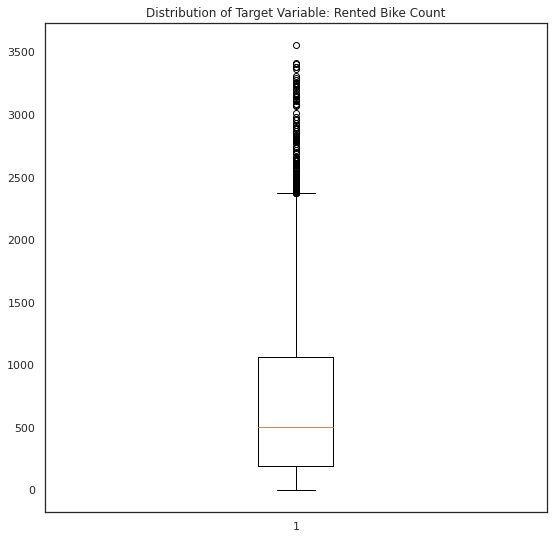

In [11]:
# Explore the data for outliers.
plt.figure(figsize=(9,9))
plt.boxplot(data['Rented Bike Count'])
plt.title("Distribution of Target Variable: Rented Bike Count")
plt.show()

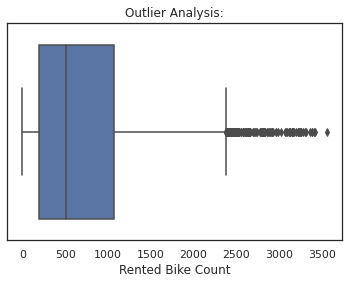

In [12]:
sns.boxplot(data['Rented Bike Count'])
plt.title('Outlier Analysis:')
plt.show()

In [13]:
#working with categorical values
df=data.select_dtypes(include='object')

In [14]:
print("Categorical Values in dataset:")
df.head()

Categorical Values in dataset:


,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [15]:
# creating categorical value dummies
df1=data
for m in df:
  dummies =pd.get_dummies(data[m],drop_first=True)
  df1 = pd.concat([df1,dummies],axis='columns')

In [16]:
print("Check Categorical Values: ")
df1.head()

Check Categorical Values: 


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),...,Holiday,Functioning Day,Month,Year,Day,Spring,Summer,Winter,No Holiday,Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,No Holiday,Yes,1,2017,12,0,0,1,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,No Holiday,Yes,1,2017,12,0,0,1,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,No Holiday,Yes,1,2017,12,0,0,1,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,No Holiday,Yes,1,2017,12,0,0,1,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,No Holiday,Yes,1,2017,12,0,0,1,1,1


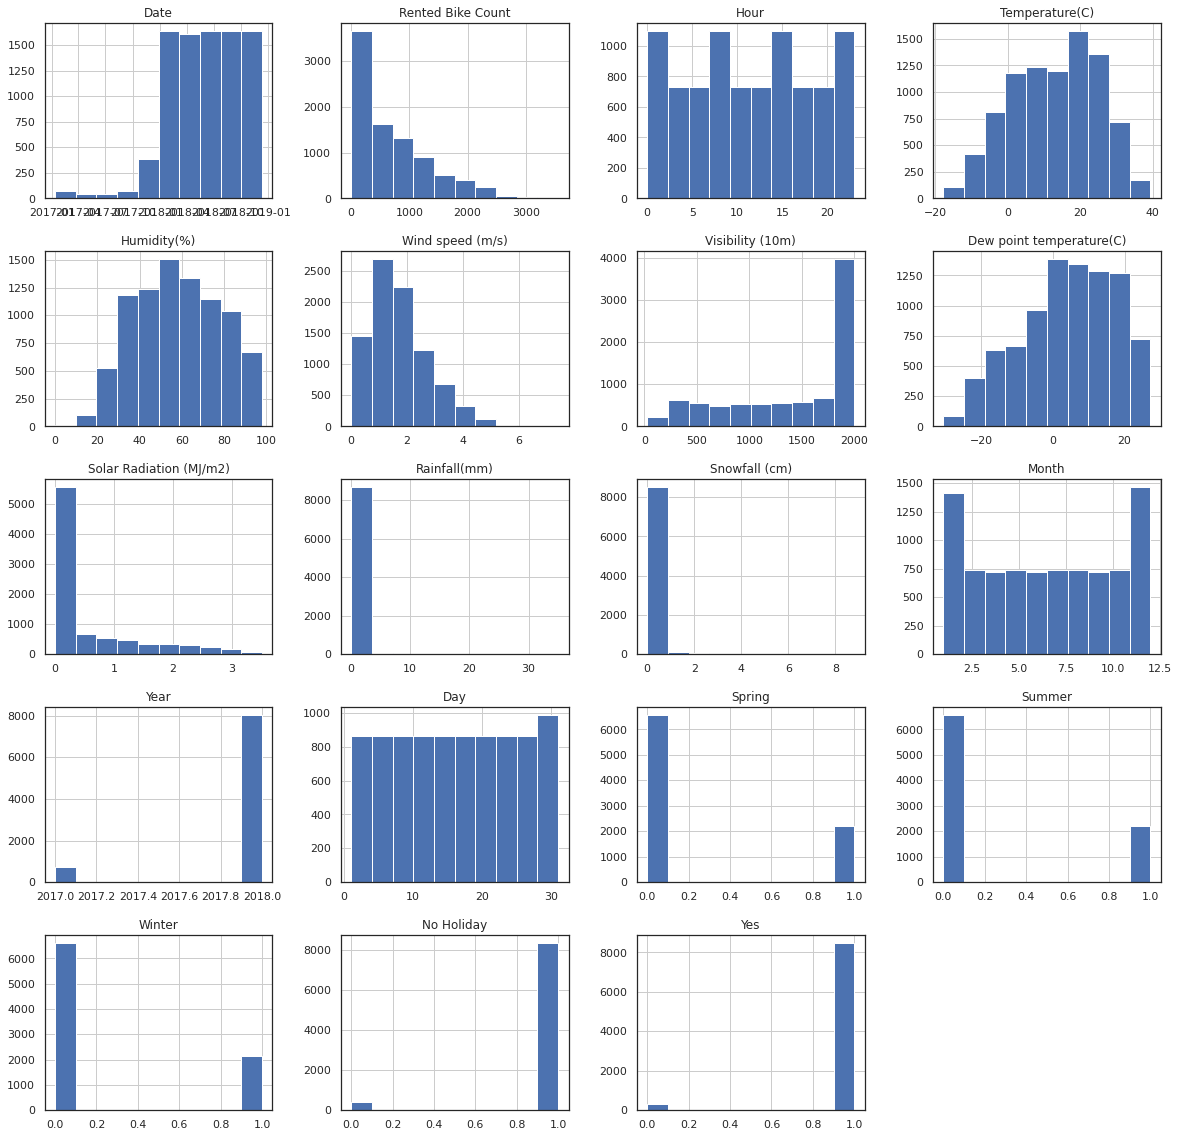

In [17]:
df1.hist(figsize=(20,20))
plt.show()

Outlier Analysis:



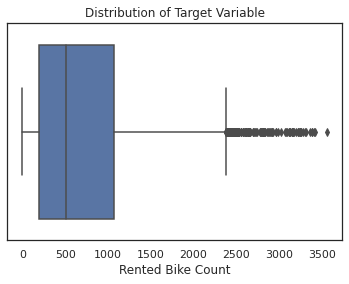

In [18]:
print("Outlier Analysis:")
print("")
sns.boxplot(df1['Rented Bike Count'])
plt.title('Distribution of Target Variable')
plt.show()

In [19]:
#remove outliers, find interquartile range (IQR)
Q1 = np.quantile(df1['Rented Bike Count'], q=.25, interpolation = 'midpoint')  
Q2 = np.quantile(df1['Rented Bike Count'], q=.50, interpolation = 'midpoint')  
Q3 = np.quantile(df1['Rented Bike Count'], q=.75, interpolation = 'midpoint')     
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1120.75
upper limit: 2377.25


In [20]:
df1.rename(columns = {'Rented Bike Count':'Rented_Bike_Count'}, inplace = True)

In [21]:
df2 = df1[df1.Rented_Bike_Count< up_lim]
df2 = df2[df2.Rented_Bike_Count> low_lim]

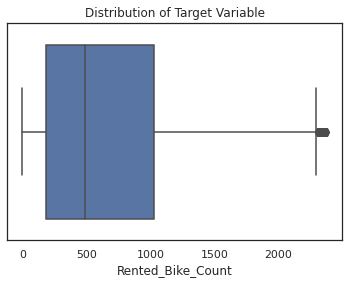

In [22]:
sns.boxplot(df2['Rented_Bike_Count'])
plt.title('Distribution of Target Variable')
plt.show()

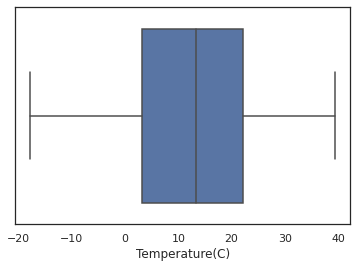

In [23]:
sns.boxplot(df2['Temperature(C)'])
plt.show()

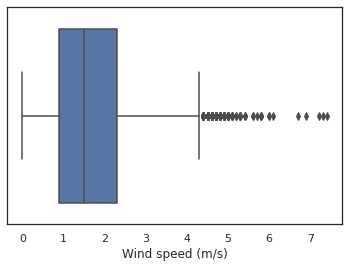

In [24]:
sns.boxplot(df2['Wind speed (m/s)'])
plt.show()

In [25]:
df2.rename(columns = {'Wind speed (m/s)':'wind_speed'}, inplace = True)

In [26]:
Q1 = np.quantile(df2['wind_speed'], q=.25, interpolation = 'midpoint')  
Q2 = np.quantile(df2['wind_speed'], q=.50, interpolation = 'midpoint')  
Q3 = np.quantile(df2['wind_speed'], q=.75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.1999999999999997
upper limit: 4.3999999999999995


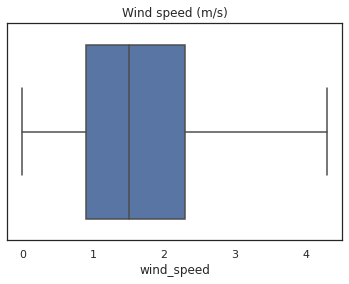

In [27]:
df2=df2[df2.wind_speed<up_lim]
df2=df2[df2.wind_speed>low_lim]

sns.boxplot(df2.wind_speed)
plt.title("Wind speed (m/s)")
plt.show()

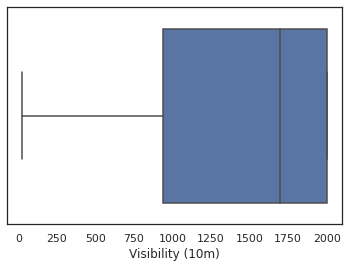

In [28]:
sns.boxplot(df1['Visibility (10m)'])
plt.show()

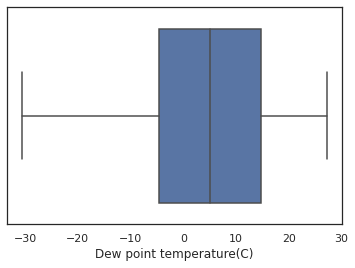

In [29]:
sns.boxplot(df2['Dew point temperature(C)'])
plt.show()

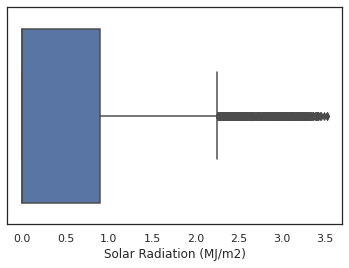

In [30]:
sns.boxplot(df2['Solar Radiation (MJ/m2)'])
plt.show()

In [31]:
df2.rename(columns = {'Solar Radiation (MJ/m2)':'sr'}, inplace = True)

In [32]:
df2.rename(columns = {'Solar Radiation (MJ/m2)':'sr'}, inplace = True)
Q1 = np.quantile(df2['sr'], q=.25, interpolation = 'midpoint')  
Q2 = np.quantile(df2['sr'], q=.50, interpolation = 'midpoint')  
Q3 = np.quantile(df2['sr'], q=.75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.35
upper limit: 2.25


In [33]:
df2 = df2[df2.sr< up_lim]
df2 = df2[df2.sr>low_lim]

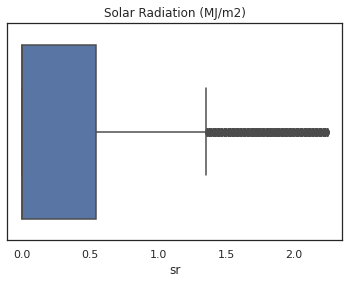


sr = Solar Radiation (MJ/m2)


In [34]:
plt.title("Solar Radiation (MJ/m2)")
sns.boxplot(df2.sr)
plt.show()
print("")
print("sr = Solar Radiation (MJ/m2)")

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      7752 non-null   datetime64[ns]
 1   Rented_Bike_Count         7752 non-null   int64         
 2   Hour                      7752 non-null   int64         
 3   Temperature(C)            7752 non-null   float64       
 4   Humidity(%)               7752 non-null   int64         
 5   wind_speed                7752 non-null   float64       
 6   Visibility (10m)          7752 non-null   int64         
 7   Dew point temperature(C)  7752 non-null   float64       
 8   sr                        7752 non-null   float64       
 9   Rainfall(mm)              7752 non-null   float64       
 10  Snowfall (cm)             7752 non-null   float64       
 11  Seasons                   7752 non-null   object        
 12  Holiday             

In [36]:
data_corr = df2.corr()
data_corr = data_corr['Rented_Bike_Count'][:-1]
data_corr[abs(data_corr)>=0.0].sort_values(ascending=False)

Rented_Bike_Count           1.000000
Temperature(C)              0.533168
Hour                        0.400517
Dew point temperature(C)    0.381486
Summer                      0.300130
sr                          0.248899
Year                        0.210914
Visibility (10m)            0.188051
wind_speed                  0.106349
Month                       0.085771
No Holiday                  0.070541
Day                         0.047612
Spring                      0.013486
Rainfall(mm)               -0.125173
Snowfall (cm)              -0.140926
Humidity(%)                -0.162957
Winter                     -0.420918
Name: Rented_Bike_Count, dtype: float64

In [37]:
df1 = df2

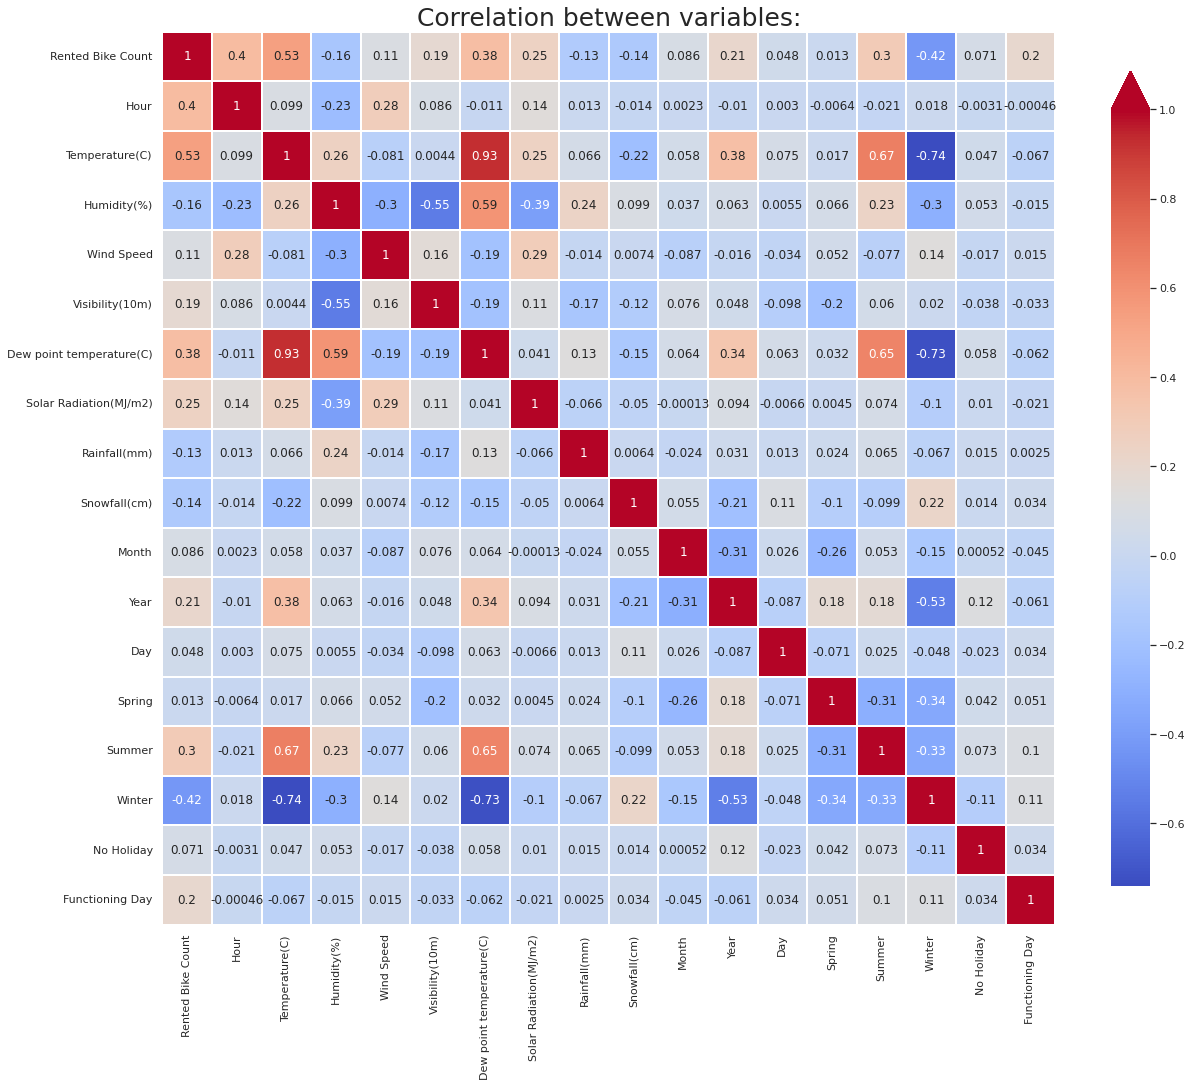


sr = Solar Radiation (MJ/m2)


In [38]:
corr = df1.corr()
plt.figure(figsize=(20,20))
cbar_kws = {"orientation":"vertical", 
            "shrink":.75,
            'extend':'max', 
            "ticks":(-.6,-.4,-.2,0,.2,.4,.6,.8,1), 
            "drawedges":False,
           }
yticks = ['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)', 'Wind Speed', 'Visibility(10m)', 'Dew point temperature(C)', 'Solar Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Month','Year', 'Day', 'Spring', 'Summer', 'Winter', 'No Holiday', 'Functioning Day']

plt.title("Correlation between variables:", fontsize=25)
sns.heatmap(corr, annot = True, yticklabels=yticks, xticklabels=yticks, cmap='coolwarm', linewidths = 1, square=True, cbar_kws=cbar_kws)
plt.show()
print()
print("sr = Solar Radiation (MJ/m2)")

In [39]:
print(df1.shape)
print(df1.columns.values)

(7752, 22)
['Date' 'Rented_Bike_Count' 'Hour' 'Temperature(C)' 'Humidity(%)'
 'wind_speed' 'Visibility (10m)' 'Dew point temperature(C)' 'sr'
 'Rainfall(mm)' 'Snowfall (cm)' 'Seasons' 'Holiday' 'Functioning Day'
 'Month' 'Year' 'Day' 'Spring' 'Summer' 'Winter' 'No Holiday' 'Yes']


In [40]:
df1 = df1.drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis =1)

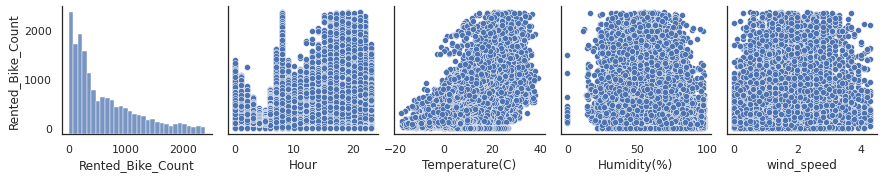

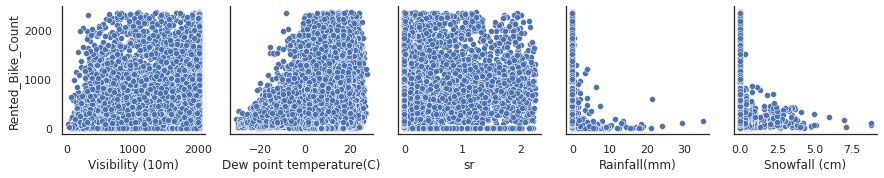

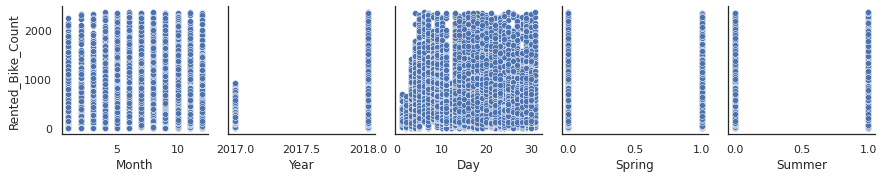

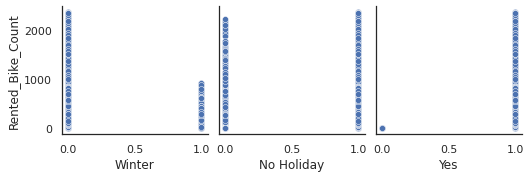

In [41]:
for i in range(0, len(df1.columns), 5):
   sns.pairplot(data=df1,
                x_vars=df1.columns[i:i+5],
                y_vars=['Rented_Bike_Count'])

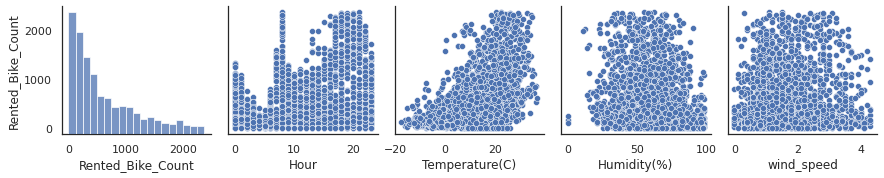

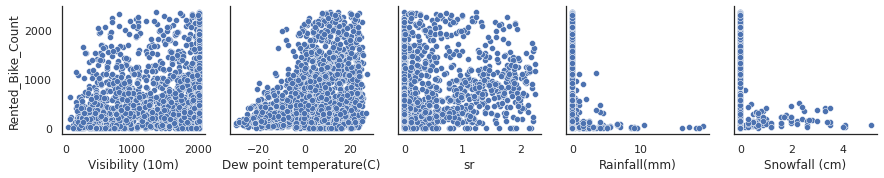

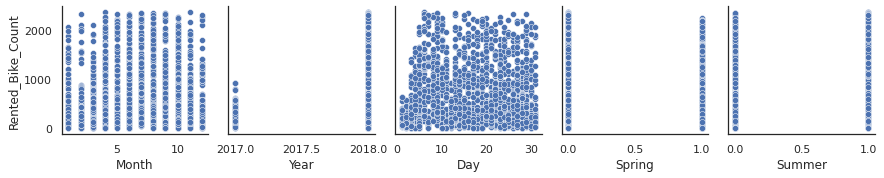

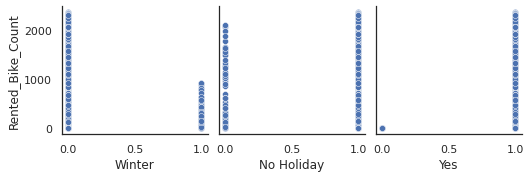

In [42]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df1, test_size=0.25,random_state=10)
for i in range(0, len(df1.columns), 5):
    sns.pairplot(data=val,
                x_vars=val.columns[i:i+5],
                y_vars=['Rented_Bike_Count'])

In [43]:
#considering only the highly correlated features
train_x = train.drop(['Rented_Bike_Count','Day'], axis = 1)
train_y = train['Rented_Bike_Count']             # output of the training data

val_x = val.drop(['Rented_Bike_Count','Day'], axis = 1)
val_y = val['Rented_Bike_Count'] 

In [44]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (5814, 16)
Dimension of train_y dataframe: (5814,)
Dimension of val_x dataframe: (1938, 16)
Dimension of val_y dataframe: (1938,)


In [45]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred=ln_reg.predict(val_x)

In [47]:
print("The model's metrics values: ")
print("Accuracy: ", ln_reg.score(val_x,val_y))
print("Mean Absolute Error: ",mean_absolute_error(df_pred , val_y))
print("Mean Squared Error: " ,mean_squared_error(df_pred,val_y))
print("R-squared score: ", r2_score(val_y,df_pred))

The model's metrics values: 
Accuracy:  0.5559079210535159
Mean Absolute Error:  307.16911038461626
Mean Squared Error:  159377.98804668878
R-squared score:  0.5559079210535159


In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge
ridge.fit(train_x,train_y)
rp=ridge.predict(val_x)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_
print("Ridge(L2) Regression:")
print("R-square score:", r2_score(rp,val_y))
print("training score:",ridge_score)
print("number of feature used:",coeff_used)

Ridge(L2) Regression:
R-square score: 0.20140835909259092
training score: 0.5559630382880278
number of feature used: 16


In [49]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso
lasso.fit(train_x,train_y)
lp=lasso.predict(val_x)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_
print("Lasso(L1) Regression:")
print("R-squared score:",r2_score(lp,val_y))
print("training score:",lasso_score)
print("number of feature used:",coeff_used)

Lasso(L1) Regression:
R-squared score: 0.18634507945171108
training score: 0.5563674745121951
number of feature used: 16
